In [63]:
import pandas as pd#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(20,6)
import warnings
warnings.filterwarnings('ignore')

In [64]:
df=pd.read_csv('/content/Alphabets_data.csv')#loading dataset

# **Data Exploration and Preprocessing**

In [65]:
df.head()#checking first 5 rows of data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [66]:
df.info()#datatypes,number of columns,null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [67]:
df.describe()#summary statistics

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [68]:
df.isna().sum()#null values in dataset 0 null values

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


<Axes: >

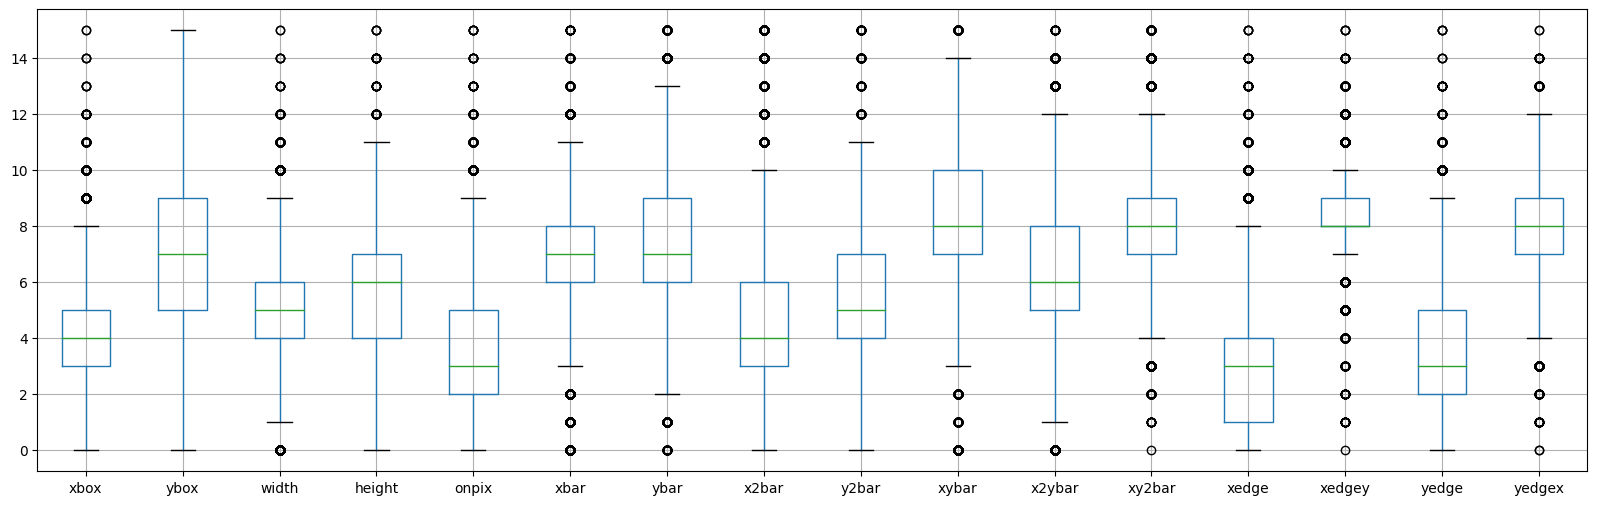

In [69]:
df.boxplot()#box plot of numrical columns

In [70]:
def cap_upper_outliers(df, column):#imputation of outliers
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Cap values above the upper bound
    df[column] = df[column].apply(lambda x: min(x, upper_bound))
    df[column] = df[column].apply(lambda x: max(min(x,upper_bound),lower_bound))
    return df

# List of numerical columns to cap outliers
columns_to_cap = ['xbox','ybox','width','height','onpix','xbar','ybar','x2bar','y2bar','xybar','x2ybar','xy2bar','xedge','xedgey','yedge','yedgex']
      # Include 'fbs' if it's not binary

# Apply the capping function to each column
for col in columns_to_cap:
    df = cap_upper_outliers(df, col)

In [118]:
from sklearn.preprocessing import LabelEncoder#changing letter column categorical column to numerical column with labelencoder
le=LabelEncoder()
df['letter']=le.fit_transform(df['letter'])

<Axes: >

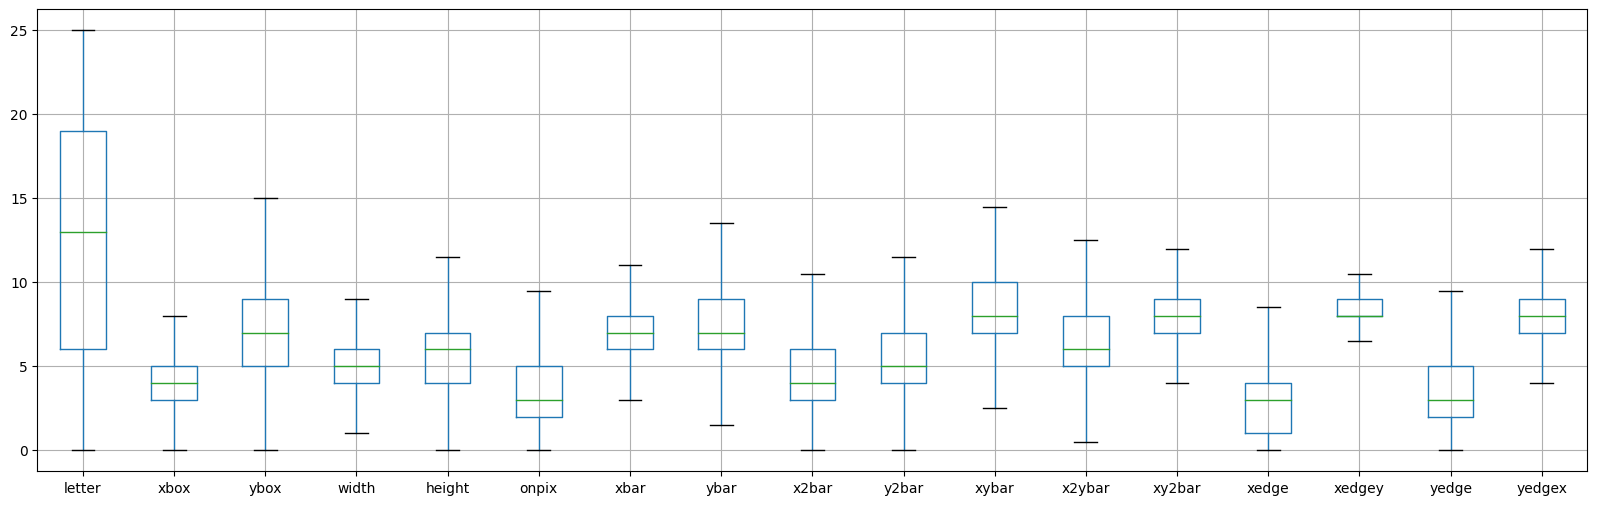

In [119]:
df.boxplot()#boxplot of entire dataset

In [73]:
X = df.drop('letter', axis=1)  #splitting the data into x and y
y = df['letter']

In [74]:
from sklearn.preprocessing import StandardScaler#scaling the data
scaler=StandardScaler()
X_normalized=scaler.fit_transform(X)

# **Model Implementation**

In [75]:
from sklearn.model_selection import train_test_split#implementing train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_normalized,y,test_size=0.2,random_state=1)

In [89]:
import tensorflow as tf#model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Building the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Output layer (adjust the number of units to match the number of classes)
model.add(Dense(units=len(y_train.unique()), activation='softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Defining early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2,callbacks=[early_stopping])


Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3834 - loss: 2.4051 - val_accuracy: 0.7181 - val_loss: 1.1090
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7390 - loss: 0.9892 - val_accuracy: 0.7828 - val_loss: 0.7993
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8001 - loss: 0.7381 - val_accuracy: 0.8097 - val_loss: 0.6712
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8302 - loss: 0.6134 - val_accuracy: 0.8331 - val_loss: 0.5869
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8561 - loss: 0.5157 - val_accuracy: 0.8472 - val_loss: 0.5335
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8661 - loss: 0.4770 - val_accuracy: 0.8541 - val_loss: 0.4893
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8787 - loss: 0.4287 - val_accuracy: 0.8681 - val_loss: 0.4502
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8959 - loss: 0.3794 - val_accuracy: 0.

In [78]:
# Making predictions on the test set
y_pred_probs = model.predict(X_test)  # Predict class probabilities for the test set

# Converting predicted probabilities to class labels
y_pred = y_pred_probs.argmax(axis=1)  # Get the index of the highest probability (class label)

# Evaluating the model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Optionally, printing the first few predictions vs actual labels
print("Predicted labels:", y_pred[:10])
print("Actual labels:   ", y_test[:10].values)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9190 - loss: 0.2652
Test Accuracy: 0.9202
Test Loss: 0.2599
Predicted labels: [ 3  3 21  1  7 13  4 16 19 13]
Actual labels:    [ 3  3 21  1  7 13  4 16 17 13]


# **Hyperparameter Tuning**


In [96]:
from sklearn.model_selection import RandomizedSearchCV#hyperparameter tuning with randomizedsearch
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Function to create the  model (for scikeras compatibility)
def create_model(optimizer='adam', neurons=128, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier (for compatibility with sklearn)
model = KerasClassifier(model=create_model, verbose=0)

# Defining the hyperparameter space
param_dist = {
    'model__optimizer': ['adam', 'rmsprop', 'sgd'],
    'model__neurons': [64, 128, 256],
    'model__activation': ['relu', 'tanh', 'sigmoid'],
    'batch_size': [16, 32, 64],
    'epochs': [20, 50, 100],
}

# Performing Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,  # Number of combinations to try
    cv=3,  # 3-fold cross-validation
    random_state=42,
    n_jobs=-1,  # Use all available cores
    scoring='accuracy'
)

# Fitting the model using RandomizedSearchCV
random_search_result = random_search.fit(X_train, y_train)

# Printing the best parameters and best score
print("Best parameters found:", random_search_result.best_params_)
print(f"Best Accuracy during tuning: {random_search_result.best_score_:.4f}")


Best parameters found: {'model__optimizer': 'rmsprop', 'model__neurons': 256, 'model__activation': 'tanh', 'epochs': 100, 'batch_size': 64}
Best Accuracy during tuning: 0.9582


In [109]:
import tensorflow as tf#re-building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Building the ANN model
Tunedmodel = Sequential()

# Input layer and first hidden layer
Tunedmodel.add(Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)))

# Output layer (adjust the number of units to match the number of classes)
Tunedmodel.add(Dense(units=len(y_train.unique()), activation='softmax'))

# Compiling the model
Tunedmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = Tunedmodel.fit(X_train, y_train, epochs=100, batch_size=6, validation_split=0.2)

Epoch 1/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - accuracy: 0.5372 - loss: 1.7563 - val_accuracy: 0.7809 - val_loss: 0.7704
Epoch 2/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8138 - loss: 0.6656 - val_accuracy: 0.8359 - val_loss: 0.5675
Epoch 3/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8596 - loss: 0.4949 - val_accuracy: 0.8616 - val_loss: 0.4687
Epoch 4/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8940 - loss: 0.3855 - val_accuracy: 0.8819 - val_loss: 0.3960
Epoch 5/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9025 - loss: 0.3234 - val_accuracy: 0.8997 - val_loss: 0.3523
Epoch 6/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9173 - loss: 0.2828 - val_accuracy: 0.9103 - val_loss: 0.3142
Epoch 7/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9305 - loss: 0.2463 - val_accuracy: 0.9131 - val_loss: 0.2892
Epoch 8/100
2134/2134 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9366 - loss:

# **Evaluation**

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluating the default model
y_pred_default = model.predict(X_test)


accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default, average='weighted')
recall_default = recall_score(y_test, y_pred_default, average='weighted')
f1_default = f1_score(y_test, y_pred_default, average='weighted')

print(f"Default Model Performance: Accuracy={accuracy_default}, Precision={precision_default}, Recall={recall_default}, F1-Score={f1_default}")

# Evaluating the tuned model (from random search)
y_pred_tuned = random_search_result.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"Tuned Model Performance: Accuracy={accuracy_tuned}, Precision={precision_tuned}, Recall={recall_tuned}, F1-Score={f1_tuned}")


Default Model Performance: Accuracy=0.04225, Precision=0.05436717210797647, Recall=0.04225, F1-Score=0.031232375937876637
Tuned Model Performance: Accuracy=0.96425, Precision=0.9648238825701955, Recall=0.96425, F1-Score=0.9642525929811486


The default model shows a  low accuracy of 0.04225, indicating that it predicts almost all classes incorrectly, the tuned model achieves an accuracy of 0.96425, so that the tuned model correctly classifies most of the test samples.

Precision in the default model is at 0.0544, that when it predicts a positive class, it is  incorrect. The tuned model's precision is improved at 0.9648, which means that the majority of the predictions it makes for the positive class are accurate.

Recall for the default model is also  low at 0.04225,  it fails to identify a significant number of actual positive cases. The tuned model,  has a recall of 0.96425, showing it effectively identifies nearly all actual positive cases.

The F1-score combines precision and recall into a single metric. The default model F1-score of 0.0312 indicates poor balance between precision and recall. The tuned model F1-score of 0.9643  a strong balance, indicating high precision and recall.

Tuning allowed for increased complexity, enabling the model to learn more intricate patterns in the data.

The tuning process may have identified more suitable activation functions.

